In [3]:
import numpy as np
import matplotlib.pyplot as plt

import nengo
from nengo.utils.ensemble import tuning_curves


# Neuron types must subclass `nengo.neurons.NeuronType`
class Sigmoid(nengo.neurons.NeuronType):
    """A rectified linear neuron model."""

    # We don't need any additional parameters here;
    # gain and bias are sufficient. But, if we wanted
    # more parameters, we could accept them by creating
    # an __init__ method.

    def gain_bias(self, max_rates, intercepts):
        """Return gain and bias given maximum firing rate and x-intercept."""
        gain = max_rates / (1 - intercepts)
        bias = -intercepts * gain
        return gain, bias

    def step(self, dt, J, output):
        """Compute rates in Hz for input current (incl. bias)"""
        output[...] = np.maximum(0.0, J)

In [11]:
model = nengo.Network()
with model:
    ens_1d = nengo.Ensemble(8, dimensions=1,neuron_type=RectifiedLinear())


In [12]:
with nengo.Simulator(model) as sim:  # Create the simulator
    sim.run(1)  # Run it for 1 second


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

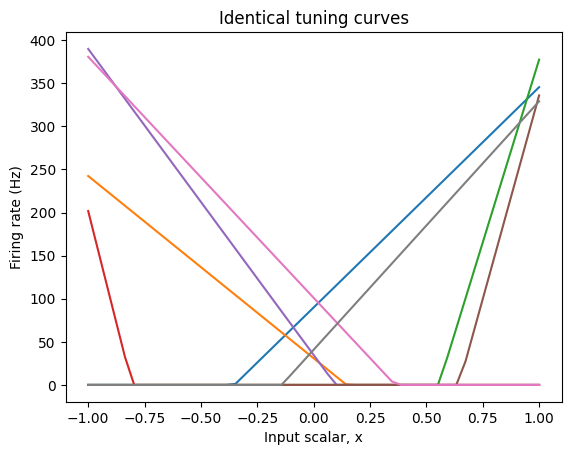

In [13]:
# inspect tuning curves
plt.plot(*tuning_curves(ens_1d, sim))
plt.ylabel("Firing rate (Hz)")
plt.xlabel("Input scalar, x")
plt.title("Identical tuning curves")
plt.show()